# Music Mood Classification from Spotify Playlists
## Deep Learning Class 1/2022
### Lecturer: Lect. Dr. Chaiwoot Boonyasiriwat
#### <div style="text-align: right"> Phurinat Udomsopagit 6536646 <br />  Nannapat Mitpothong 6537711 </div> 

In [1]:
# installing spotipy
!pip install spotipy -q # Start writing code here...

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# importing the necessary packages
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
import spotipy.util as util
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras

2022-12-20 16:25:11.578600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 16:25:11.882544: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-20 16:25:11.889717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 16:25:11.889749: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [4]:
import seaborn as sns

# Load Data

In [5]:
cid = '1226a18bba7e474fa487766459065c89'
secret = '8d6d22a323b7484188b56913e0a96b3a'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [6]:
import pandas as pd
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name", "track_id","danceability",
    "energy","key","loudness","mode", "speechiness","instrumentalness","liveness",
    "valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [7]:
# Happy, Sad, Relaxing, and Energetic.
playlists = {
    'Energetic':   ["https://open.spotify.com/playlist/37i9dQZF1DWSnRSDTCsoPk?si=24909a5a1ab34fd6", 
                    "https://open.spotify.com/playlist/37i9dQZF1DX0vHZ8elq0UK?si=ea161adbd78b4dcb"],
    'Relaxing':["https://open.spotify.com/playlist/37i9dQZF1DX0bGxKepv6YZ?si=931137c667f74148",
                "https://open.spotify.com/playlist/37i9dQZF1DX6ziVCJnEm59?si=0d1a15dc45dd4f0e",],
    'Sad':["https://open.spotify.com/playlist/37i9dQZF1DX3YSRoSdA634?si=e5598132ae074898",
            "https://open.spotify.com/playlist/37i9dQZF1DWW2hj3ZtMbuO?si=33d14d014ae640dd",],
    'Happy':   ["https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC?si=bcf07083bc6748b5",
                "https://open.spotify.com/playlist/37i9dQZF1DWXahxq4Q8el6?si=a522054163fd427d",]
}

tracks = pd.DataFrame()
moods = []

for mood, links in playlists.items():
    print (mood)
    for link in links:
        id = link[34:56]
        try:
            tracks_dum = call_playlist("spotify", id)
            # ids = [foo['track']['id'] for foo in pl_tracks]
        except:
            print (link)
            continue
        tracks_dum['mood'] = mood
        tracks = tracks.append(tracks_dum)
    print(tracks)

Energetic
           artist                            album  \
0     LE SSERAFIM                         FEARLESS   
1             BTS                            Proof   
2          NAYEON                        IM NAYEON   
3             PSY                          PSY 9th   
4        (G)I-DLE                      I NEVER DIE   
..            ...                              ...   
95   Shawn Mendes            Shawn Mendes (Deluxe)   
96     Little Mix     Get Weird (Expanded Edition)   
97         Madism                  Pumped Up Kicks   
98     Katy Perry                    Teenage Dream   
99  One Direction  Take Me Home (Expanded Edition)   

                               track_name                track_id  \
0                                FEARLESS  296nXCOv97WJNRWzIBQnoj   
1                                  Butter  6jjYDGxVJsWS0a5wlVF5vS   
2                                    POP!  3lOMJTQTd6J34faYwASc33   
3   That That (prod. & feat. SUGA of BTS)  7GNRUsU3M4XNDDB9xle5Dz

In [8]:
tracks['mood'].unique()
len(tracks['track_name'].unique())

606

In [9]:
tracks.reset_index(drop=True, inplace=True)

In [10]:
tracks.to_csv('tracks_data.csv')

In [11]:
raw_track = pd.read_csv('tracks_data.csv')
raw_track.drop('Unnamed: 0', axis=1, inplace=True)
raw_track

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mood
0,LE SSERAFIM,FEARLESS,FEARLESS,296nXCOv97WJNRWzIBQnoj,0.863,0.620,7,-7.167,1,0.1350,0.00324,0.1290,0.4320,103.971,168437,4,Energetic
1,BTS,Proof,Butter,6jjYDGxVJsWS0a5wlVF5vS,0.759,0.459,8,-5.187,1,0.0948,0.00000,0.0788,0.6950,109.997,164952,4,Energetic
2,NAYEON,IM NAYEON,POP!,3lOMJTQTd6J34faYwASc33,0.795,0.859,2,-2.994,1,0.0542,0.00000,0.0321,0.3560,96.986,168107,4,Energetic
3,PSY,PSY 9th,That That (prod. & feat. SUGA of BTS),7GNRUsU3M4XNDDB9xle5Dz,0.905,0.962,4,-3.197,1,0.0856,0.00000,0.0272,0.9060,129.969,174647,4,Energetic
4,(G)I-DLE,I NEVER DIE,TOMBOY,0IGUXY4JbK18bu9oD4mPIm,0.755,0.870,1,-2.414,0,0.0936,0.00000,0.0917,0.6450,124.032,174387,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Rachel Portman,The Duchess (Original Motion Picture Soundtrack),End Titles,1CxT3WZkSuEAxPOKAPzDDl,0.175,0.171,4,-19.589,0,0.0411,0.90000,0.2080,0.0746,122.278,128320,4,Happy
627,Christopher Willis,The Personal History of David Copperfield (Ori...,Adventures of a London Gentleman,16iqQIS5kz8tj2EeoDvq7i,0.267,0.272,4,-12.788,1,0.0375,0.82400,0.1990,0.1500,125.267,229787,4,Happy
628,Ilan Eshkeri,Stardust - Music From The Motion Picture,Flying Vessel,1kmkBb6u7bA37GxDaNPils,0.221,0.383,7,-12.740,1,0.0474,0.90900,0.1440,0.0749,96.289,221573,4,Happy
629,Ennio Morricone,Nuovo Cinema Paradiso (Original Motion Picture...,Nuovo Cinema Paradiso,4xx3UI7cLCk1awQPAPLeHj,0.274,0.148,10,-16.815,1,0.0367,0.88900,0.1210,0.1880,127.323,178667,3,Happy


# Visualized Data Correlation

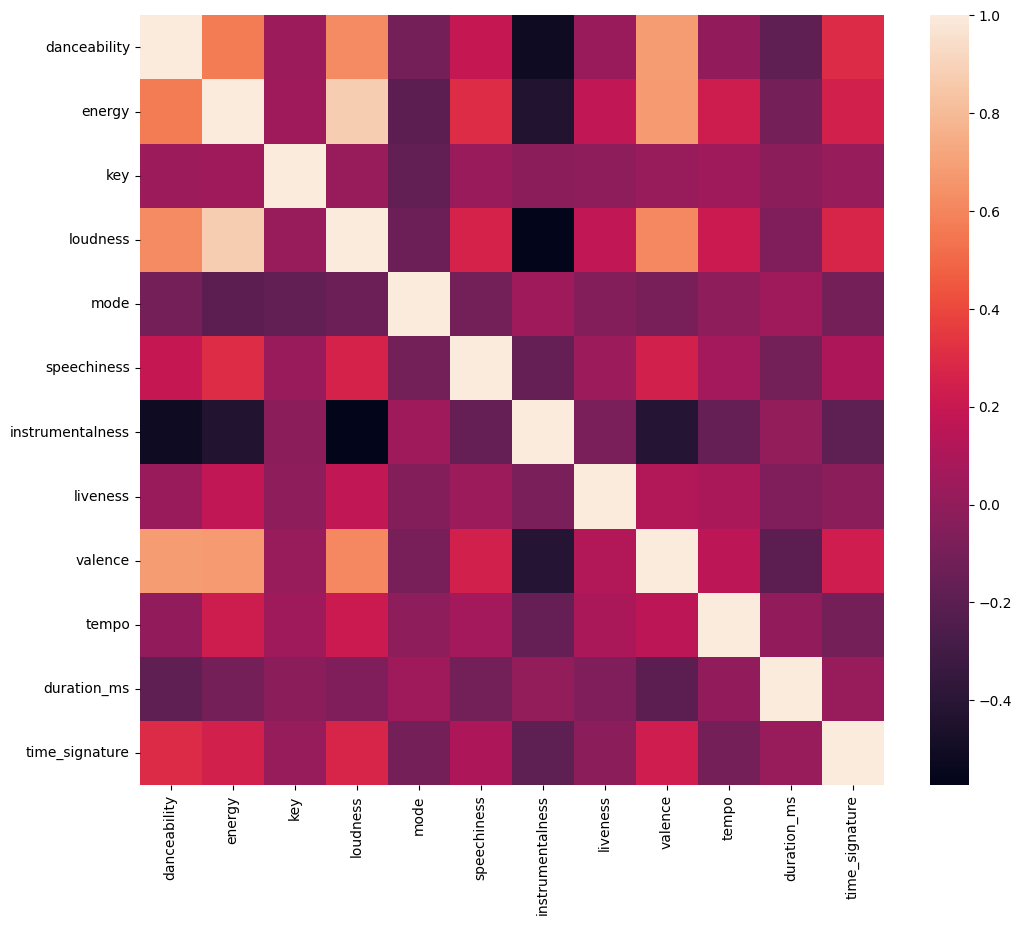

In [12]:
tracks_corr = raw_track.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(tracks_corr, ax=ax)
plt.show()

In [43]:
import tensorflow as tf
from keras import Sequential, callbacks
from keras import optimizers, models
from keras.layers import Dense, Flatten, Dropout, Input, Resizing
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import time

In [14]:
print(f"Number of duplicated tracks is {sum(raw_track['track_name'].duplicated())}")

Number of duplicated tracks is 25


In [15]:
raw_track.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'mood'],
      dtype='object')

# Cleaned and Visualized Data

In [16]:
tracks_deduplica = raw_track[~raw_track['track_name'].duplicated()].copy()
tracks_deduplica.drop(['artist', 'album', 'track_id', 'duration_ms', 'time_signature', 'key', 'mode'], axis=1, inplace=True)
tracks_deduplica.set_index('track_name', inplace=True)

In [17]:
tracks_deduplica

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,mood
track_name,,,,,,,,,
FEARLESS,0.863,0.620,-7.167,0.1350,0.00324,0.1290,0.4320,103.971,Energetic
Butter,0.759,0.459,-5.187,0.0948,0.00000,0.0788,0.6950,109.997,Energetic
POP!,0.795,0.859,-2.994,0.0542,0.00000,0.0321,0.3560,96.986,Energetic
That That (prod. & feat. SUGA of BTS),0.905,0.962,-3.197,0.0856,0.00000,0.0272,0.9060,129.969,Energetic
TOMBOY,0.755,0.870,-2.414,0.0936,0.00000,0.0917,0.6450,124.032,Energetic
...,...,...,...,...,...,...,...,...,...
End Titles,0.175,0.171,-19.589,0.0411,0.90000,0.2080,0.0746,122.278,Happy
Adventures of a London Gentleman,0.267,0.272,-12.788,0.0375,0.82400,0.1990,0.1500,125.267,Happy
Flying Vessel,0.221,0.383,-12.740,0.0474,0.90900,0.1440,0.0749,96.289,Happy


In [18]:
DeepnoteChart(tracks_deduplica, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"aggregate":"count"},"y":{"sort":null,"type":"nominal","field":"mood","scale":{"type":"linear"}}}}""")

# Preprocessing Data

In [19]:
train, test = train_test_split(tracks_deduplica, test_size = 0.25, stratify = tracks_deduplica['mood'], random_state = 43)

In [20]:
print(f"Number of rows in training set: {len(train)}")
print(f"Number of rows in test set: {len(test)}")

Number of rows in training set: 454
Number of rows in test set: 152


In [21]:
train.iloc[:, 0:-1]

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
track_name,,,,,,,,
Recording 15,0.5520,0.126,-18.014,0.0306,0.015300,0.1090,0.4390,92.441
Sorry,0.5130,0.250,-9.376,0.0367,0.000000,0.1170,0.3510,74.103
Another Love,0.4450,0.537,-8.532,0.0400,0.000017,0.0944,0.1310,122.769
Sinking Ship,0.3700,0.174,-19.316,0.0377,0.002900,0.1100,0.1810,92.750
All I Want,0.1880,0.411,-9.733,0.0484,0.153000,0.0843,0.1590,187.376
...,...,...,...,...,...,...,...,...
two queens in a king sized bed,0.3610,0.218,-14.989,0.0338,0.000577,0.0748,0.1670,114.476
This Feeling,0.5750,0.571,-7.906,0.0439,0.000000,0.0912,0.4490,105.049
Main Titles from the HBO Miniseries Band of Brothers - Instrumental,0.0842,0.176,-17.619,0.0376,0.970000,0.1020,0.0392,84.325


In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
encoder = LabelEncoder()
train.iloc[:, 0:-1] = scaler.fit_transform(train.iloc[:, 0:-1])
test.iloc[:, 0:-1] = scaler.fit_transform(test.iloc[:, 0:-1])
train.iloc[:, 0:-1]

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
track_name,,,,,,,,
Recording 15,0.550786,0.120590,0.496789,0.012735,0.015773,0.126440,0.431391,0.221722
Sorry,0.505043,0.249032,0.743342,0.025066,0.000000,0.138107,0.336981,0.091529
Another Love,0.425287,0.546311,0.767433,0.031736,0.000017,0.105148,0.100955,0.437040
Sinking Ship,0.337321,0.170309,0.459626,0.027087,0.002990,0.127898,0.154597,0.223916
All I Want,0.123856,0.415798,0.733153,0.048716,0.157732,0.090419,0.130995,0.895727
...,...,...,...,...,...,...,...,...
two queens in a king sized bed,0.326765,0.215885,0.583131,0.019204,0.000595,0.076564,0.139577,0.378163
This Feeling,0.577762,0.581529,0.785300,0.039620,0.000000,0.100481,0.442120,0.311234
Main Titles from the HBO Miniseries Band of Brothers - Instrumental,0.002111,0.172381,0.508063,0.026885,1.000000,0.116232,0.002468,0.164101


In [23]:
train.iloc[:, -1] = encoder.fit_transform(train.iloc[:, -1])
test.iloc[:, -1] = encoder.fit_transform(test.iloc[:, -1])

In [24]:
x_train = train.iloc[:, 0:-1].astype('float32')
x_test = test.iloc[:, 0:-1].astype('float32')
y_train = to_categorical(train['mood'], num_classes=4)
y_test = to_categorical(test['mood'], num_classes=4)

# Build Model

In [45]:
import keras
keras.__version__

'2.10.0'

In [48]:
sgd = optimizers.SGD(learning_rate=0.0015, momentum=0.8, nesterov=True)
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
Total params: 884
Trainable params: 884
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1, validation_split=0.2, epochs=200)

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.3140 - val_loss: 0.1836 - val_accuracy: 0.2857
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.3444 - val_loss: 0.1818 - val_accuracy: 0.2857
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.1800 - accuracy: 0.3416 - val_loss: 0.1806 - val_accuracy: 0.2857
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.3416 - val_loss: 0.1798 - val_accuracy: 0.2857
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.3416 - val_loss: 0.1790 - val_accuracy: 0.2857
Epoch 6/200
363/363 [==============================] - 0s 1ms/step - loss: 0.1767 - accuracy: 0.3388 - val_loss: 0.1780 - val_accuracy: 0.2857
Epoch 7/200
363/363 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.3416 - val_loss: 0.1767 - val_accuracy: 0.2857

# Visualize Model Performances

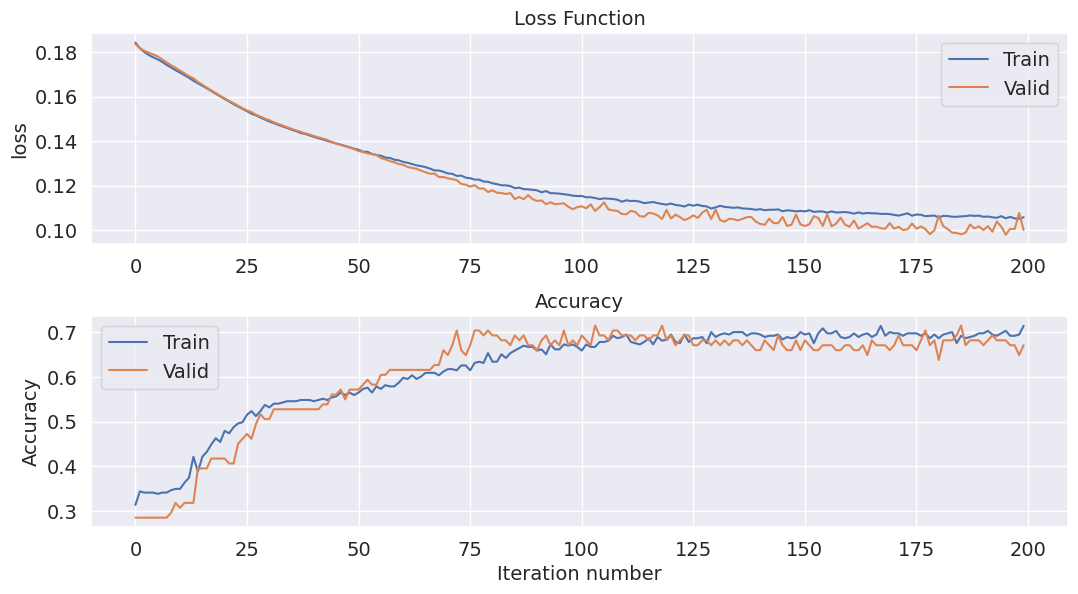

In [104]:
plt.rcParams.update({'font.size': 14})
fig2, axes = plt.subplots(2, 1, figsize=(11, 6.5))
axes[0].plot(history.epoch,history.history['loss'], label='Train')
axes[0].plot(history.epoch,history.history['val_loss'], label='Valid')
axes[0].set_ylabel('loss', fontsize=14)
axes[0].set_title('Loss Function', fontsize=14)
axes[0].xaxis.set_tick_params(labelsize=14)
axes[0].yaxis.set_tick_params(labelsize=14)
axes[0].legend(fontsize=14)
axes[1].plot(history.epoch,history.history['accuracy'], label='Train')
axes[1].plot(history.epoch,history.history['val_accuracy'], label='Valid')
#axes[1].scatter(x=129, y=0.8097,'r*', label='0.8097')
axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].set_xlabel('Iteration number', fontsize=14)
axes[1].set_title('Accuracy', fontsize=14)
axes[1].xaxis.set_tick_params(labelsize=14)
axes[1].yaxis.set_tick_params(labelsize=14)
axes[1].legend(fontsize=14)
# fig2.suptitle('MLP with SGD')
fig2.tight_layout()
fig2.subplots_adjust(top=0.88)
fig2.show()

# Test Prediction Model 

In [105]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

5/5 [==============================] - 0s 1ms/step


In [106]:
y_pred_class

array([0, 1, 2, 0, 1, 0, 3, 3, 0, 1, 0, 1, 2, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 0, 3, 0, 1, 2, 3, 1, 1, 2, 2, 0, 2, 0, 0, 3, 3, 2, 3, 1,
       3, 2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 3, 3, 0, 1, 2, 2, 0, 0, 0, 1, 3,
       0, 2, 3, 1, 1, 0, 3, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 3, 2, 0,
       0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 3, 3, 0, 1, 0, 2, 0,
       0, 3, 0, 2, 2, 3, 3, 3, 0, 0, 0, 0, 1, 3, 0, 3, 1, 0, 1, 3, 1, 2,
       0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 3, 1, 0, 3, 2, 2, 3, 1, 0])

In [129]:
keys = encoder.classes_
values = encoder.transform(encoder.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Energetic': 0, 'Happy': 1, 'Relaxing': 2, 'Sad': 3}


# Model Evaluations

In [116]:
from sklearn.metrics import accuracy_score, precision_score
acc_score = accuracy_score(y_pred=y_pred_class, y_true = test['mood'])
pc_score = precision_score(average=None, y_pred=y_pred_class, y_true = test['mood'])
print(f'Accuracy score is {acc_score}, Precision score is {pc_score} ')

Accuracy score is 0.6644736842105263, Precision score is [0.78947368 0.77419355 0.42857143 0.5862069 ] 


**** Confusion Matrix ****
[[45  2  0  3]
 [11 24  0  0]
 [ 0  1 15  9]
 [ 1  4 20 17]]
**** Classification Report ****
              precision    recall  f1-score   support

   Energetic       0.79      0.90      0.84        50
       Happy       0.77      0.69      0.73        35
    Relaxing       0.43      0.60      0.50        25
         Sad       0.59      0.40      0.48        42

    accuracy                           0.66       152
   macro avg       0.64      0.65      0.64       152
weighted avg       0.67      0.66      0.66       152



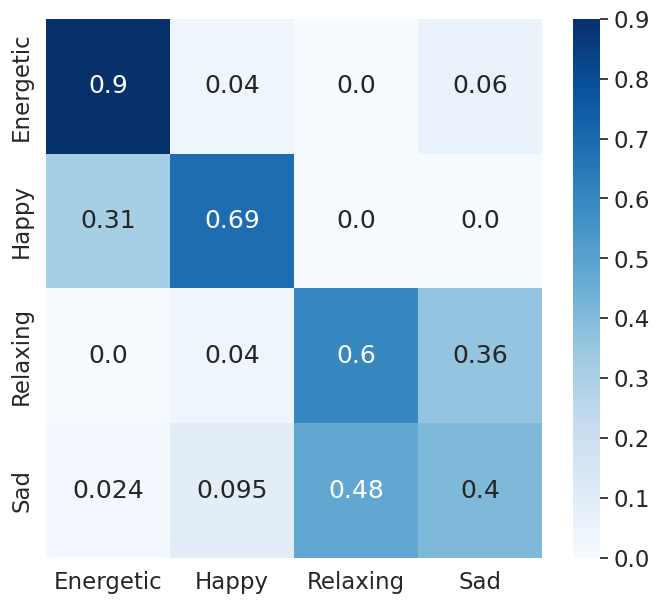

In [135]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test,y_scores, classNames):
    y_test=np.argmax(y_test, axis=1)
    y_scores=np.argmax(y_scores, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(8,7))
    sns.set(font_scale=1.5) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")

classNames = ['Energetic', 'Happy', 'Relaxing', 'Sad'] 
plot_confusion_matrix(y_test,y_pred, classNames) 

In [130]:
pred_class_y = pd.DataFrame(y_pred_class.astype(np.float32), columns=['class'])
track_test = x_test.copy()
track_test.drop(["danceability","energy","loudness", "speechiness","instrumentalness","liveness","valence","tempo"], axis=1, inplace=True)
track_test = pd.DataFrame(track_test)
track_test = track_test.reset_index()
pred_trackclass = pd.concat([track_test,pred_class_y], axis =1)
pred_trackclass.set_index('track_name', inplace=True)
pred_trackclass

,class
track_name,
Bad Habits,0.0
Cake By The Ocean,1.0
Thousand (feat. Lisa Hannigan),2.0
Blessed-Cursed,0.0
Between the Bars,1.0
...,...
Paper Bag,2.0
Eye to Eye (feat. Sarah Jarosz),2.0
Car's Outside,3.0


# Discussion
## Feature on metadata
- Artist names and other datas might be able to used as a feature to improve the model accuracy.
- Neglecting some features (i.e., instrumentalness) might improve the model accuracy.

# References
- Mikemoschitto. (2022, May 18). Deep learning and music: Mood Classification of spotify songs. Medium. Retrieved December 21, 2022, from https://mikemoschitto.medium.com/deep-learning-and-music-mood-classification-of-spotify-songs-b2dda2bf455 
- Singh, K. (2021, May 29). Music mood classification using neural networks and Spotify's web api. Medium. Retrieved December 21, 2022, from https://medium.com/codex/music-mood-classification-using-neural-networks-and-spotifys-web-api-d73b391044a4 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33b7183f-3186-4608-b624-baae3fa397a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>